In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import itertools


In [9]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
columns = df.columns.tolist()
columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

7
5.0
6


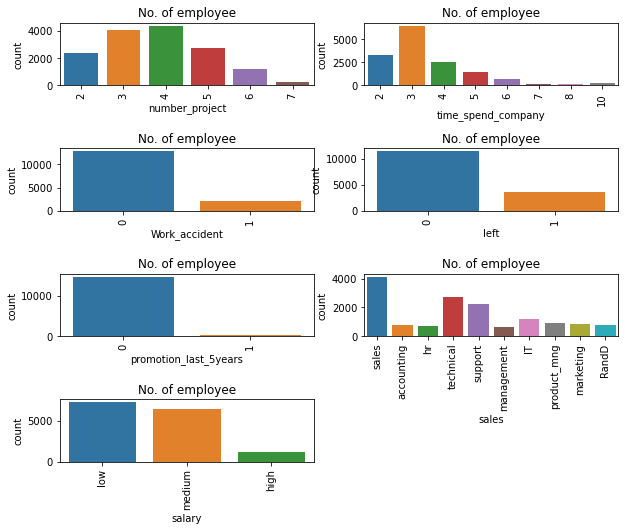

In [35]:
categorical=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
length=len(categorical)
print (length)
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(nrows = np.ceil(length),ncols= 2,j+1) # One big plot -> break it into many small plots
    sns.countplot(x=i,data = df)
    plt.subplots_adjust(hspace=1)
    plt.xticks(rotation=90)
    plt.title("No. of employee")
    
print (np.ceil(length/2+1))
print (j)

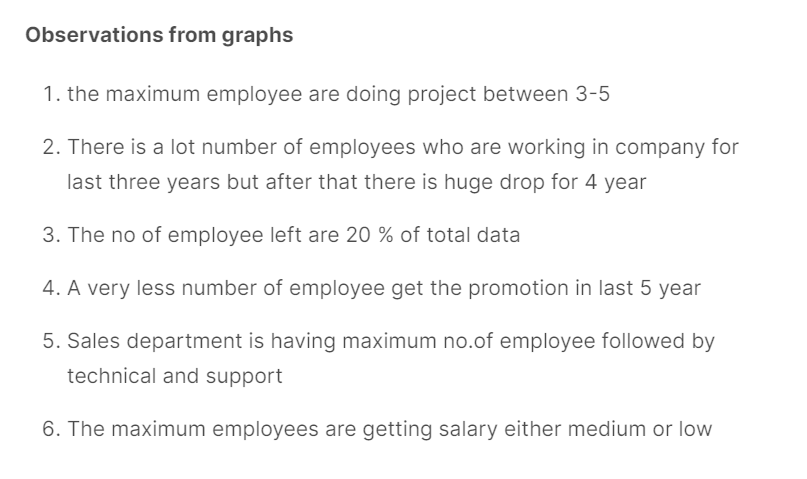

In [43]:
print("The Number of employee who left the company :",len(df[df['left']==1]))

left = len(df[df['left']==1])

The Number of employee who left the company : 3571


In [49]:
print("The Number of employee who didnt leave the company :",len(df)-left)
remain = len(df.index)-left

The Number of employee who didnt leave the company : 11428


In [48]:
print("The proportion of employee who left",left/len(df))

The proportion of employee who left 0.2380825388359224


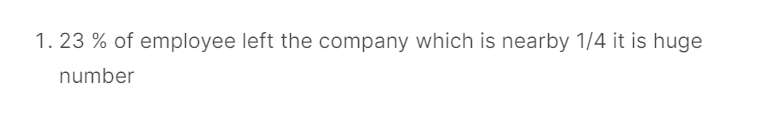

hue shows the different categorical variables

Read [more](https://seaborn.pydata.org/generated/seaborn.countplot.html)

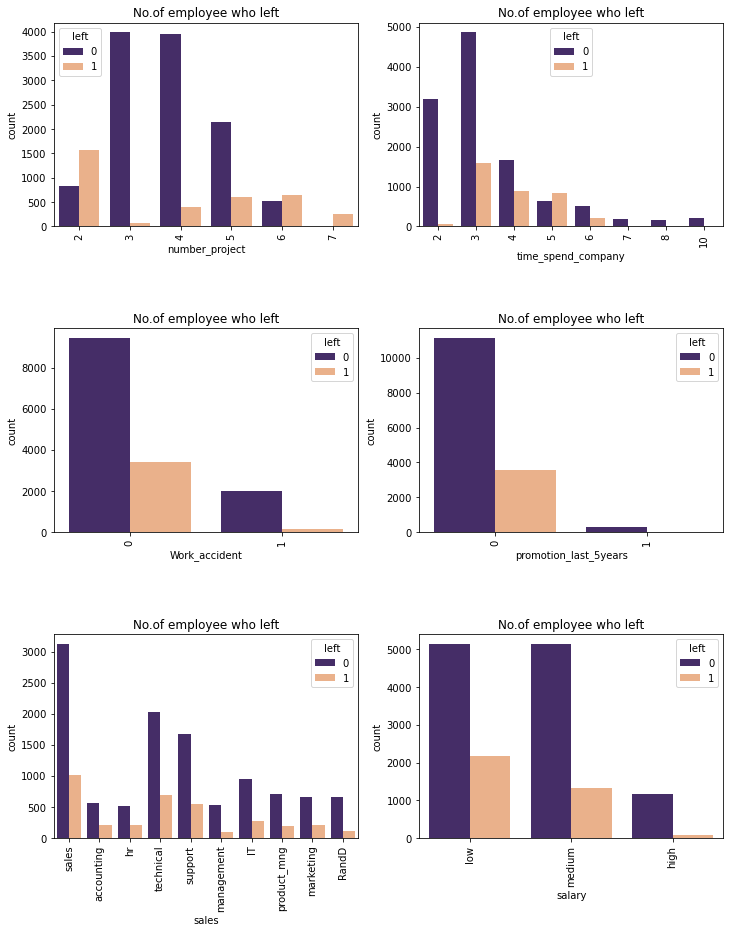

In [57]:
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary'] # here I have removed left to see who is leaving cpmpany
fig=plt.subplots(figsize=(12,15))# to define the size of figure

length=len(categorical) # no of categorical and ordinal variable

for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1) # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplots_adjust(hspace=0.5) # to adjust the distance between subplots
    sns.countplot(x=i,data = df,hue="left", palette=['#432371',"#FAAE7B"]) # To plot the countplot of variable with hue left
    plt.xticks(rotation=90) # to rotate the xticks by 90 such that no xtixks overlap each other
    plt.title("No.of employee who left") # to plot the title of graph

**Observations**
1) The number of people who left increase after spending 3 years in the company
2) A lot of people left when they are not promoted in the past 5 years
3) People with low and medium wage tend to leave than high wage
4) For people who spent 5 years in the company, 

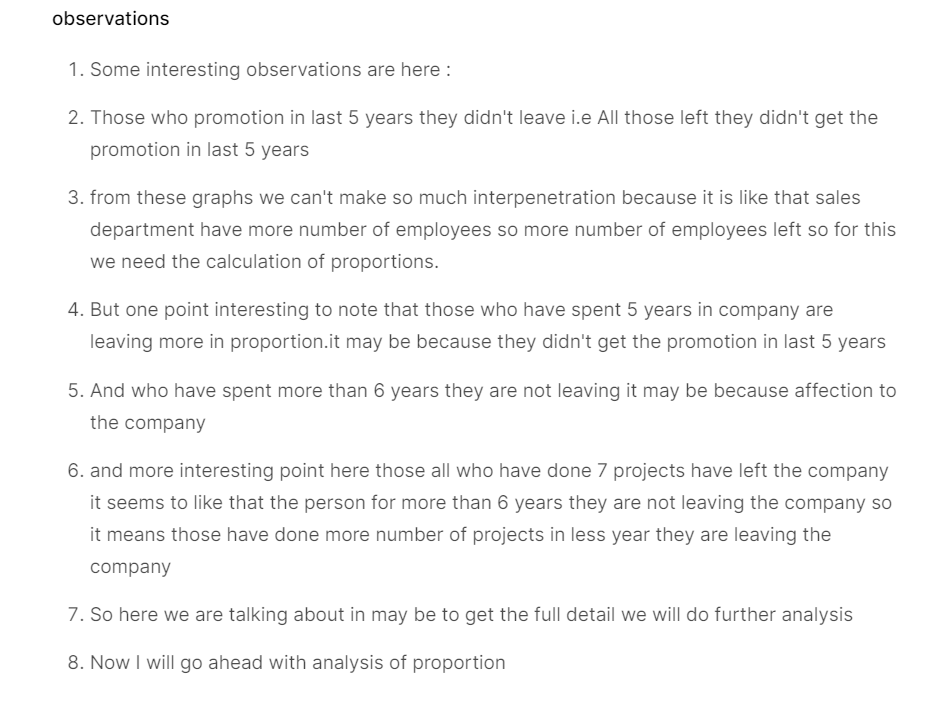

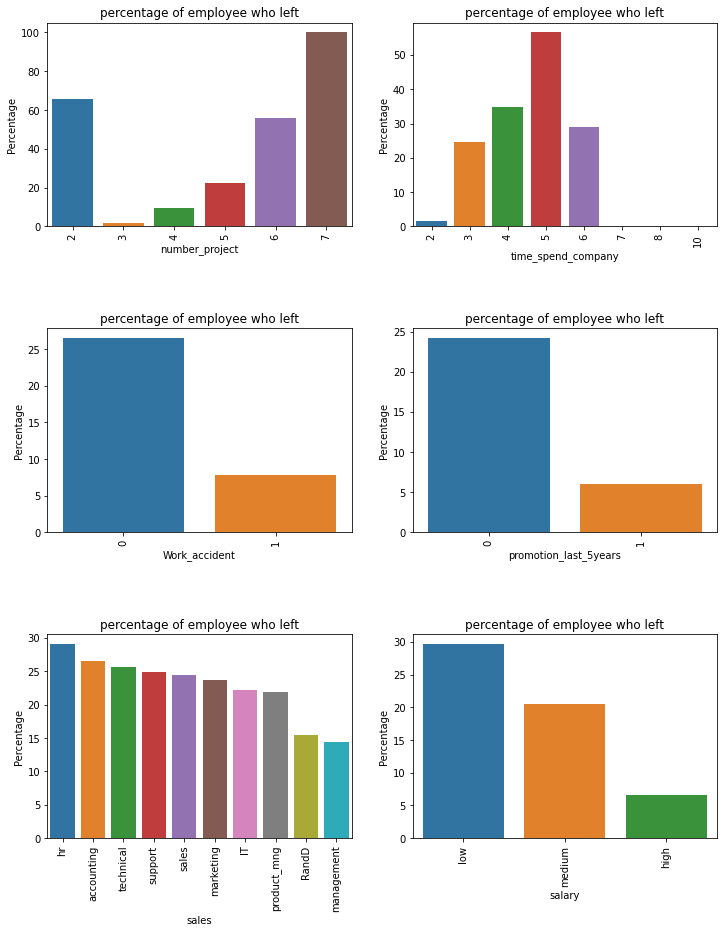

In [72]:
# Lets Calcualte proportion for above same
fig=plt.subplots(figsize=(12,15))
for i,j in itertools.zip_longest(categorical,range(length)):# itertools.zip_longest for to execute the longest loop
    
    
    Proportion_of_data = df.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()# only counting the number who left 
    Proportion_of_data1=df.groupby([i])['left'].count().reset_index() # Counting the total number 
    
    # Merging the two dataframes
    
    Proportion_of_data2=pd.merge(Proportion_of_data, Proportion_of_data1, on=i)
    
    # Forming a new column
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['left_x']/Proportion_of_data2['left_y'])*100 
    Proportion_of_data2=Proportion_of_data2.sort_values(by="Proportion",ascending=False).reset_index(drop=True) #sorting by percentage
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("percentage of employee who left")
    plt.ylabel('Percentage')


**Observation**
100% of the employees who did 7 projects left the company, there is a possbility that each employee do more than 1 project per year as there is a high percentage of them who left after spending more than 5 years in the company

From year 7 onwards, no one left, it could be due to affection or no one stayed till that long

Promotion is not a really huge factor here since those who left the company without promotion is only 20% higher than those with promotion and left. 

People who left after 2 projects most likely got fired by the company

The previous observation shows that Sales have a lot of people leaving but in this graph the proportion of sales staff leaving is not that high, HR is higher. 